In [1]:
import numpy as np
import lib_read_HiPSTAR as lh
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
GF = lh.get_grids(wdir='./Sfiles/',fmt='PLOT3D')

Global dimensions: 422, 781, 98 ==> 32299036
Subset dimensions: 422, 781, 98 ==> 32299036


In [3]:
## File opening
#f = open('Sfiles/Sfile_b1_995000','rb')
f = open('/storage/clav/Postdoc/ph.m48.pulsed.Re20k/Sfiles/Sfile_b1_1250000','rb')
## Header Reading
t_sim, t_capt = np.fromfile(f,dtype=np.dtype('float64'),count=2)
print t_sim, t_capt

n,nxp,nyp,nzp,nsteps,n_groups = np.fromfile(f,dtype=np.dtype('int32'),count=6)
print n,nxp,nyp,nzp,nsteps,n_groups

## Group Reading
nvar = 0
for i in range(n_groups):
    gid, nvar_loc = np.fromfile(f,dtype=np.dtype('int32'),count=2)
    print gid,nvar_loc
    nvar = nvar_loc + nvar
## File closing
f.close()

0.0002 0.002
-10 422 781 98 15000 2
0 16
4 1


In [4]:
#tsteps = [1400000] ## t = 250-280
#tsteps = [1450000, 1500000, 1550000, 1600000] ## t = 280-320
#tsteps = [1650000, 1700000, 1750000, 1800000] ## t = 320-360
#tsteps = [1850000, 1900000, 1950000, 2000000] ## t = 360-400
#tsteps = [2050000, 2100000, 2150000, 2200000] ## t = 400-440 ## Not available on account of NaN beyond t = 400

tsteps = [1400000,
          1450000, 1500000, 1550000, 1600000, 
          1650000, 1700000, 1750000, 1800000, 
          1850000, 1900000, 1950000, 2000000]
time = int(tsteps[-1]*0.0002)
print time
data = np.zeros((nxp,nyp,nzp,nvar))
t_tot = 0.
for i in tsteps:
    ## Read in the data file
    #RS = lh.read_Sfile(GF,wdir = './Sfiles/',tstep=i)
    RS = lh.read_Sfile(GF,wdir = '/storage/clav/Postdoc/ph.m48.pulsed.Re20k/Sfiles/',tstep=i)
    div_stat = t_capt*nsteps
    t_tot = t_tot + div_stat
    data[...] = data[...] + RS[0].data[...]*div_stat
data[...] = data[...]/t_tot
RS = []

400
Sfile_b1_1400000 contains 17 variables.
Sfile_b1_1450000 contains 17 variables.
Sfile_b1_1500000 contains 17 variables.
Sfile_b1_1550000 contains 17 variables.
Sfile_b1_1600000 contains 17 variables.
Sfile_b1_1650000 contains 17 variables.
Sfile_b1_1700000 contains 17 variables.
Sfile_b1_1750000 contains 17 variables.
Sfile_b1_1800000 contains 17 variables.
Sfile_b1_1850000 contains 17 variables.
Sfile_b1_1900000 contains 17 variables.
Sfile_b1_1950000 contains 17 variables.
Sfile_b1_2000000 contains 17 variables.


In [5]:
x = np.zeros((nxp,nyp,nzp))
y = np.zeros((nxp,nyp,nzp))
z = np.zeros((nxp,nyp,nzp))

# Read grid file to get dimensions
f = open('Sfiles/FLOW_phys_GRID_1.xyz', 'rb')
data_type1 = np.dtype('int32')
nxp,nyp,nzp = np.fromfile(f,dtype=data_type1,count=3)
data_type2 = np.dtype('float32')
print nxp,nyp,nzp
for k in range(nzp):
    for j in range(nyp):
        x[:,j,k] = np.fromfile(f,dtype=data_type2,count=nxp)
for k in range(nzp):
    for j in range(nyp):
        y[:,j,k] = np.fromfile(f,dtype=data_type2,count=nxp)
for k in range(nzp):
    for j in range(nyp):
        z[:,j,k] = np.fromfile(f,dtype=data_type2,count=nxp)
f.close()

422 781 98


In [6]:
## Cylindrical coordinates
r = np.sqrt(y**2 + z**2)
theta = np.arctan(y/z)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


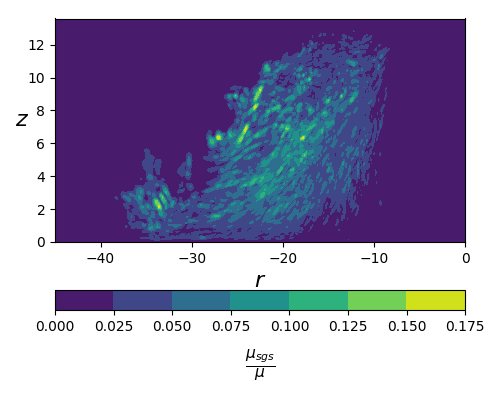

In [12]:
k_ind = 48
plt.figure(figsize=(5,4))
cba = plt.contourf(-1*r[:,:,k_ind],x[:,:,k_ind]
                   ,data[:,:,k_ind,16]/data[:,:,k_ind,8])
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$\frac{\mu_{sgs}}{\mu}$',rotation=0,fontsize=16,labelpad=10)
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$z$',fontsize=16,rotation=0)
plt.tight_layout()
plt.show()
#plt.savefig('figures/t'+str(time)+'_musgsbymu_zr.eps')
#plt.savefig('figures/musgsbymu_zr.eps')

<IPython.core.display.Javascript object>


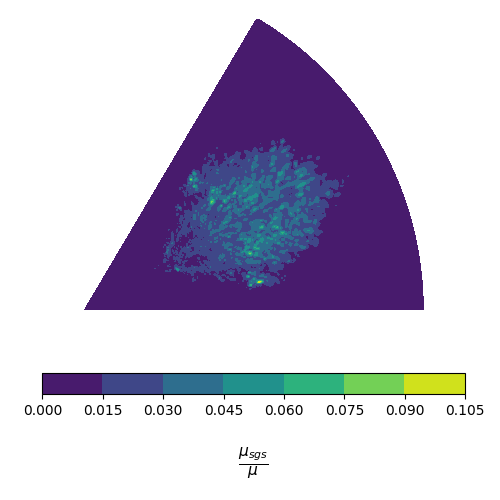

In [13]:
i_ind = 50
plt.figure(figsize=(5,5))
cba = plt.contourf(z[i_ind,:,:], y[i_ind,:,:]
                   ,data[i_ind,:,:,16]/data[i_ind,:,:,8])
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$\frac{\mu_{sgs}}{\mu}$',rotation=0,fontsize=16,labelpad=20)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.savefig('figures/t'+str(time)+'_musgsbymu_rtheta_z'+str(i_ind)+'.eps')
#plt.savefig('figures/musgsbymu_rtheta_z'+str(i_ind)+'.eps')

<IPython.core.display.Javascript object>


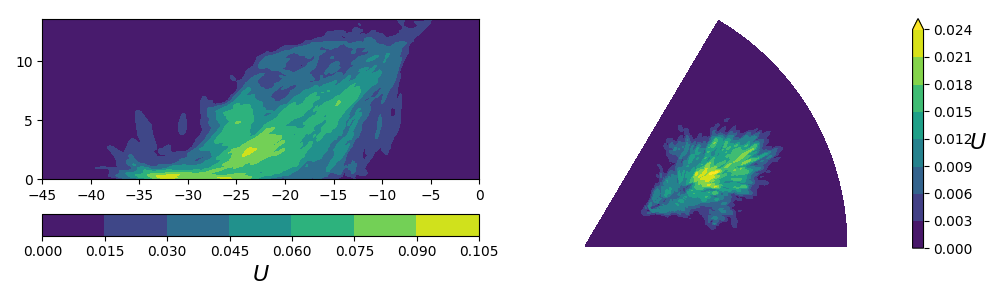

In [10]:
k_ind = nzp/2; i_ind = 1
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
cba = plt.contourf(-1*np.sqrt(z[:,:,k_ind]**2+y[:,:,k_ind]**2),x[:,:,k_ind]
                   ,(np.sqrt(data[...,2]**2 + data[...,3]**2 + data[...,15]**2)/data[...,0])[:,:,k_ind])

clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$U$',rotation=0,fontsize=16)
#plt.axis('off')
#plt.axis('equal')
plt.tight_layout()

plt.subplot(1,2,2)
cba = plt.contourf(z[i_ind,:,:], y[i_ind,:,:]
                   ,(np.sqrt(data[...,2]**2 + data[...,3]**2 + data[...,15]**2)/data[...,0])[i_ind,:,:],
                  levels=np.linspace(0,0.024,9),extend='max')
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$U$',rotation=0,fontsize=16)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('figures_new/Re20k_t240-400_U.pdf')
#plt.savefig('../figures/musgsbymu_rtheta_z'+str(i_ind)+'.eps')

<IPython.core.display.Javascript object>


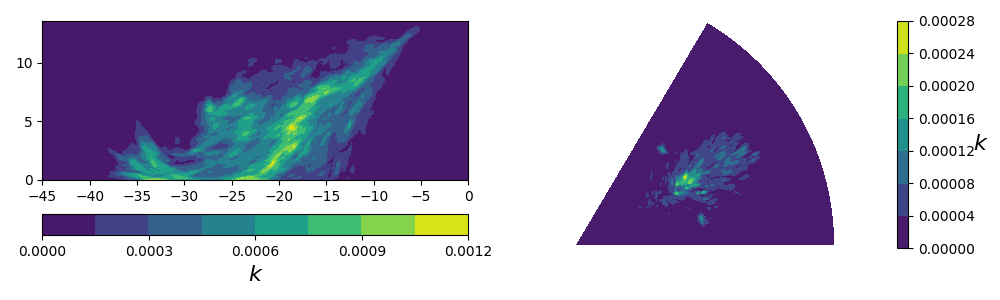

In [12]:
tke = 0.5*((data[...,9] + data[...,10] + data[...,12])/data[...,0] 
           - (data[...,2]**2 + data[...,3]**2 + data[...,15]**2)/data[...,0]**2)
k_ind = nzp/2; i_ind = 1
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
cba = plt.contourf(-1*np.sqrt(z[:,:,k_ind]**2+y[:,:,k_ind]**2),x[:,:,k_ind]
                   ,tke[:,:,k_ind])

clb = plt.colorbar(cba,orientation='horizontal',ticks=[0, 0.0003, 0.0006, 0.0009, 0.0012])
clb.set_label(r'$k$',rotation=0,fontsize=16)
#plt.axis('off')
#plt.axis('equal')
plt.tight_layout()

plt.subplot(1,2,2)
cba = plt.contourf(z[i_ind,:,:], y[i_ind,:,:]
                   ,tke[i_ind,:,:])
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$k$',rotation=0,fontsize=16)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('figures_new/Re20k_t240-400_k.pdf')
#plt.savefig('../figures/musgsbymu_rtheta_z'+str(i_ind)+'.eps')

## Corrected Friction Reynolds Number

In [11]:
u_z = data[...,2]/data[...,0]; u_r = data[...,3]/data[...,0]; u_th = data[...,15]/data[...,0]
## Calculated using net resultant of wall shear stress components, See Schilicting
u_star = np.sqrt(data[0,:,:,8]/data[0,:,:,0]*np.sqrt(
          ((u_r[1,:,:]-u_r[0,:,:])/(x[1,:,:]-x[0,:,:]))**2 +
          ((u_th[1,:,:]-u_th[0,:,:])/(x[1,:,:]-x[0,:,:]))**2
         ))

Re_tau = u_star*data[0,:,:,0]/data[0,:,:,8]

## uplus = U/ustar , yplus = ustar*y/nu
uplus = np.zeros((nxp,nyp,nzp)); yplus = np.zeros((nxp,nyp,nzp))
uplus_r = np.zeros((nxp,nyp,nzp)); uplus_th = np.zeros((nxp,nyp,nzp))
yplus_r = np.zeros((nxp,nyp,nzp)); yplus_th = np.zeros((nxp,nyp,nzp))
for i in range(nxp):
    uplus[i,:,:] = np.sqrt((u_r[i])**2 + (u_th[i])**2)/(u_star[:,:]+1e-10)
    yplus[i,:,:] = u_star[:,:]*x[i,:,:]*data[i,:,:,0]/data[i,:,:,8]

In [12]:
from scipy.integrate import simps as sps
delta = np.zeros((nyp,nzp)); delta_star = np.zeros((nyp,nzp))
u_delta = np.zeros(np.shape(delta)); rho_delta = np.zeros(np.shape(delta))

## Compute displacement thickness = integral (1 - rho*u/ref)
#flux = data[...,3]/data[...,0] ## v_r 
u_net = np.sqrt(u_r**2 + u_th**2)
for k in range(nzp):
    for j in range(nyp):
        for i in range(nxp):
            if abs(u_net[i,j,k]) >= abs(u_net[i+1,j,k]):
                index = i
                break
        if index == 0 or Re_tau[j,k] == 0:
            delta[j,k] = 0.
        else:
            delta[j,k] = x[index,j,k] 
            delta_star[j,k] = sps(1 - data[:index,j,k,0]*u_net[:index,j,k]/(data[index,j,k,0]*u_net[index,j,k]),x=x[:index,j,k])
            
            u_delta[j,k] = np.sqrt(data[index,j,k,3]**2 + data[index,j,k,15]**2)/data[index,j,k,0]
            rho_delta[j,k] = data[index,j,k,0]
            
Re_tau_alt = u_star*data[0,:,:,0]/data[0,:,:,8]*delta

14.375918972319795 30.31840655186133


<IPython.core.display.Javascript object>


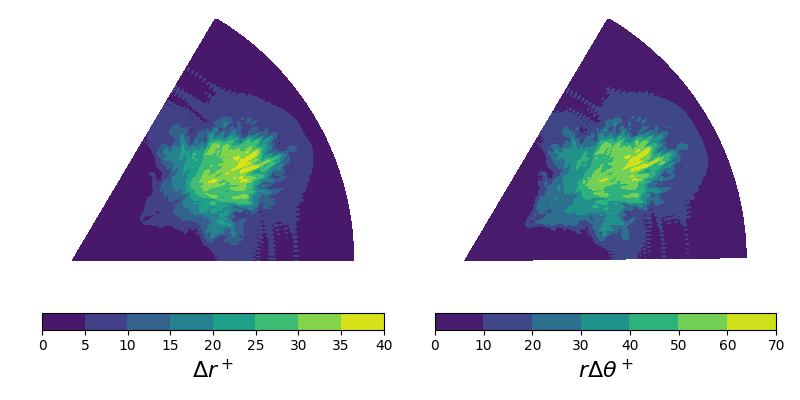

In [29]:
## Plus Value Ranges
rplus = [(r[0,j+1,:]-r[0,j,:])*u_star[j,:]*data[0,j,:,0]/data[0,j,:,8] for j in range(nyp-1)]
dthplus = [(theta[0,:,j+1]-theta[0,:,j])*r[0,:,j]*u_star[:,j]*data[0,:,j,0]/data[0,:,j,8] for j in range(nzp-1)]

count = 0; val = 0; val1 = 0
for k in range(nzp):
    for j in range(1,nyp):
        if u_star[j,k] > 0.004:
            count = count + 1
            val = val + rplus[j][k]
            val1 = val1 + dthplus[k][j]
print val/count, val1/count
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
#cba = plt.contourf(z[0,:,1:],y[0,:,1:],np.transpose(dthplus))#,levels=np.linspace(0,105,8))
cba = plt.contourf(z[0,1:,:],y[0,1:,:],rplus)#,levels=np.linspace(0,105,8))
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$\Delta r^+$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')
plt.subplot(1,2,2)
cba = plt.contourf(z[0,:,1:],y[0,:,1:],np.transpose(dthplus))#,levels=np.linspace(0,105,8))
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$r \Delta \theta^+$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')

plt.tight_layout()
plt.show()
#plt.savefig('figures/t'+str(time)+'_Re_tau_delta.eps')
#plt.savefig('figures/Re_tau_delta.eps')

<IPython.core.display.Javascript object>


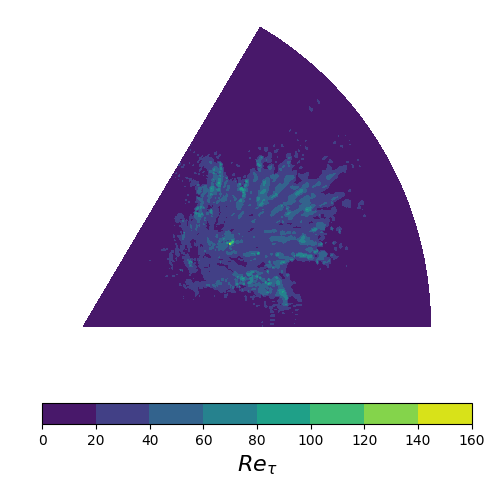

In [20]:
## Friction Re = u_tau * delta / nu where delta = channel half height
plt.figure(figsize=(5,5))
cba = plt.contourf(z[0,:,:],y[0,:,:],Re_tau_alt)#,levels=np.linspace(0,105,8))
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$Re_{\tau}$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.savefig('figures/t'+str(time)+'_Re_tau_delta.eps')
#plt.savefig('figures/Re_tau_delta.eps')

In [ ]:
## Save Retau field
import csv
#with open('data/t'+str(time)+'_Retau.csv','w') as cf:
with open('data/Retau.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nzp = '+str(nzp), 'nyp = '+str(nyp), 'Retau'])
    for k in range(nzp):
        for j in range(nyp):
            fp.writerow([str(z[0,j,k]), str(y[0,j,k]), str(Re_tau_alt[j,k])])

## Averaged Profiles

In [ ]:
## Re_tau in [1200,1400]
#low = 200; upp = low + 200
#low = 15; upp = low + 15
for ll in range(15,150,15):
    low = ll; upp = low + 15
    uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
    for k in range(nzp):
        for j in range(nyp):
            if Re_tau_alt[j,k] > low and Re_tau_alt[j,k] < upp:
                uavg[:] = uavg[:] + uplus[:,j,k]
                yavg[:] = yavg[:] + yplus[:,j,k]
                count = count + 1
    uavg = uavg/count; yavg = yavg/count
    print count
    kappa = 0.41; B = 5.0
    plt.figure()
    plt.semilogx(yavg[:],uavg[:],label='Data')
    plt.semilogx(np.linspace(1,10),np.linspace(1,10),'--',label=r'$u^+=z^+$')
    plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
             ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
    plt.xlabel(r'$z^+$',fontsize=16)
    plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
    plt.xlim(1,100)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('figures/t'+str(time)+'_vrth+_Retau'+str(low)+'-'+str(upp)+'_log.eps')
    #plt.savefig('figures/onlyvr+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

    ## Save data
    with open('data/t'+str(time)+'_vrth+_Retau'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
    #with open('data/onlyvr+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
        fp = csv.writer(cf)
        fp.writerow(['averaging points = '+str(count)])
        fp.writerow(['u+', 'y+'])
        for i in range(nxp):
            fp.writerow([str(uavg[i]), str(yavg[i])])

## Profiles at fixed location

In [ ]:
uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(46,51):
    for j in range(675,681):
        uavg[:] = uavg[:] + uplus[:,j,k]
        yavg[:] = yavg[:] + yplus[:,j,k]       
        count = count + 1
uavg = uavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],uavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
plt.xlim(1,100)
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/t'+str(time)+'_vrth+_r25th30_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

## Save data
with open('data/t'+str(time)+'_vrth+_r25th30_log.csv','w') as cf:
#with open('../data/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['averaging points = '+str(count)])
    fp.writerow(['u+', 'y+'])
    for i in range(nxp):
        fp.writerow([str(uavg[i]), str(yavg[i])])

In [ ]:
uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(31,36):
    for j in range(675,681):
        uavg[:] = uavg[:] + uplus[:,j,k]
        yavg[:] = yavg[:] + yplus[:,j,k]       
        count = count + 1
uavg = uavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],uavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
plt.xlim(1,100)
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/t'+str(time)+'_vrth+_r25th20_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

## Save data
with open('data/t'+str(time)+'_vrth+_r25th20_log.csv','w') as cf:
#with open('../data/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['averaging points = '+str(count)])
    fp.writerow(['u+', 'y+'])
    for i in range(nxp):
        fp.writerow([str(uavg[i]), str(yavg[i])])

In [ ]:
uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(46,51):
    for j in range(705,711):
        uavg[:] = uavg[:] + uplus[:,j,k]
        yavg[:] = yavg[:] + yplus[:,j,k]       
        count = count + 1
uavg = uavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],uavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
plt.xlim(1,100)
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/t'+str(time)+'_vrth+_r30th30_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

## Save data
with open('data/t'+str(time)+'_vrth+_r30th30_log.csv','w') as cf:
#with open('../data/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['averaging points = '+str(count)])
    fp.writerow(['u+', 'y+'])
    for i in range(nxp):
        fp.writerow([str(uavg[i]), str(yavg[i])])

In [ ]:
uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(31,36):
    for j in range(705,711):
        uavg[:] = uavg[:] + uplus[:,j,k]
        yavg[:] = yavg[:] + yplus[:,j,k]       
        count = count + 1
uavg = uavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],uavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
plt.xlim(1,100)
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/t'+str(time)+'_vrth+_r30th20_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

## Save data
with open('data/t'+str(time)+'_vrth+_r30th20_log.csv','w') as cf:
#with open('../data/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['averaging points = '+str(count)])
    fp.writerow(['u+', 'y+'])
    for i in range(nxp):
        fp.writerow([str(uavg[i]), str(yavg[i])])

## Temperature Profiles

In [ ]:
T_star = q_z*(gamma-1)*Ma**2/(data[0,:,:,0]*u_star)
Tplus = np.zeros((nxp,nyp,nzp))
for i in range(nxp):
    Tplus[i,:,:] = ((data[i,:,:,4]-data[0,:,:,4])/data[i,:,:,0])/(T_star[:,:]+1e-10)
Tavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(46,51):
    for j in range(675,681):
        Tavg[:] = Tavg[:] + Tplus[:,j,k]
        yavg[:] = yavg[:] + yplus[:,j,k]       
        count = count + 1
Tavg = Tavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],Tavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$T^+$',rotation=0,fontsize=16)
#plt.xlim(1,100)
#plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
#plt.savefig('../figures/t'+str(time)+'_vrth+_r25th30_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')

## Save data
#with open('../data/t'+str(time)+'_vrth+_r25th30_log.csv','w') as cf:
#with open('../data/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.csv','w') as cf:
#    fp = csv.writer(cf)
#    fp.writerow(['averaging points = '+str(count)])
#    fp.writerow(['u+', 'y+'])
#    for i in range(nxp):
#        fp.writerow([str(uavg[i]), str(yavg[i])])

## Radial Velocity Contours

In [ ]:
k_ind = 48; i_ind = 50#128
plt.figure(figsize=(8,3))
cba = plt.contourf(-1*np.sqrt(z[:i_ind,:,k_ind]**2+y[:i_ind,:,k_ind]**2),x[:i_ind,:,k_ind]
                   ,data[:i_ind,:,k_ind,3]/data[:i_ind,:,k_ind,0])
plt.contour(-1*np.sqrt(z[:i_ind,:,k_ind]**2+y[:i_ind,:,k_ind]**2),x[:i_ind,:,k_ind]
                   ,data[:i_ind,:,k_ind,3]/data[:i_ind,:,k_ind,0],colors='black')
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$v_r$',rotation=0,fontsize=16,labelpad=20)
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$z$',fontsize=16,rotation=0)
plt.tight_layout()
plt.xlim(-40,-10)
plt.show()
plt.savefig('figures/t'+str(time)+'_vr_zr.eps')
#plt.savefig('figures/vr_zr.eps')

## Checking outer-layer similarity

In [96]:
count = 0
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            count = count + 1
print count

9182


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


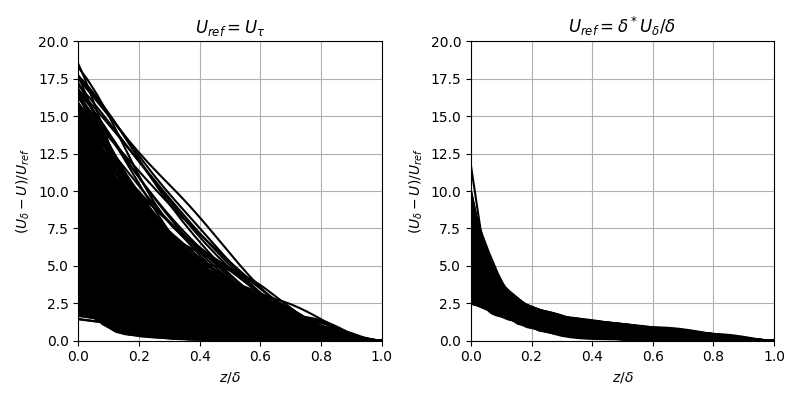

In [24]:
## Law U_delta - U = u_tau*F(y/\delta)
Ud_m_Unet_by_utau = np.zeros(np.shape(u_z))
for i in range(nxp):
    Ud_m_Unet_by_utau[i] = (u_delta - u_net[i])/u_star
    
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title(r"$U_{ref} = U_\tau$")
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            plt.plot(x[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k],'k')
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,20)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$(U_\delta - U)/U_{ref}$')
plt.subplot(1,2,2)
plt.title(r"$U_{ref} = \delta^* U_\delta /\delta$")
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            plt.plot(x[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k]*u_star[j,k]*delta[j,k]/(delta_star[j,k]*u_delta[j,k]),'k')
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,20)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$(U_\delta - U)/U_{ref}$')
plt.tight_layout()
plt.show()
plt.savefig("figures_new/velocity_defect.pdf")

(422, 781, 98)


<IPython.core.display.Javascript object>


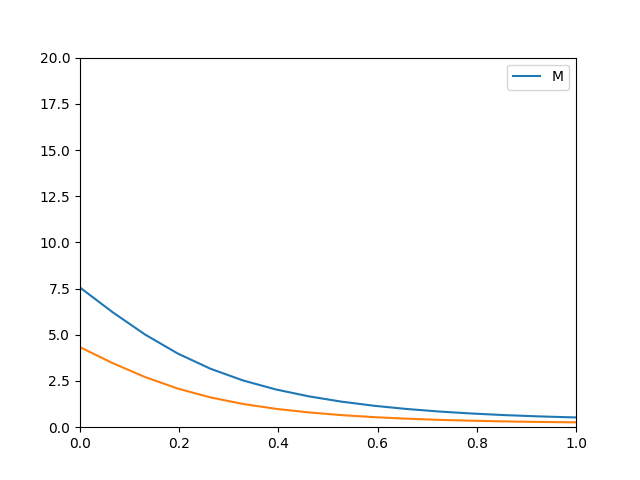

In [95]:
defect = Ud_m_Unet_by_utau
print np.shape(defect)
mask = np.ndarray.flatten(u_star) > 4e-3
mean_defect = np.zeros(np.shape(x[:,0,0]))
for i in range(len(x[:,0,0])):
    arr = np.ndarray.flatten(defect[i])
    mean_defect[i] = np.mean(arr[mask],axis=-1)

mean_new_defect = np.zeros(np.shape(mean_defect))
mean_x = np.zeros(np.shape(mean_defect))
for i in range(len(mean_new_defect)):
    arr = np.ndarray.flatten(defect[i]*u_star*delta/(delta_star*u_delta+1e-5))
    mean_new_defect[i] = np.mean(arr[mask],axis=-1)
    arr = np.ndarray.flatten(x[i]/(delta+1e-5))
    mean_x[i] = np.mean(arr[mask], axis=-1)
plt.figure()
plt.plot(mean_x,mean_defect,label="M")
plt.plot(mean_x,mean_new_defect)
plt.xlim(0,1)
plt.ylim(0,20)
plt.legend(loc='best')
plt.show()

with open('data_new/velocity_defect_mean.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['z/delta', 'defect/utau', 'defect/newscale'])
    for i in range(nxp):
        fp.writerow([str(mean_x[i]), str(mean_defect[i]), str(mean_new_defect[i])])

## Pressure Gradient Effects

<IPython.core.display.Javascript object>


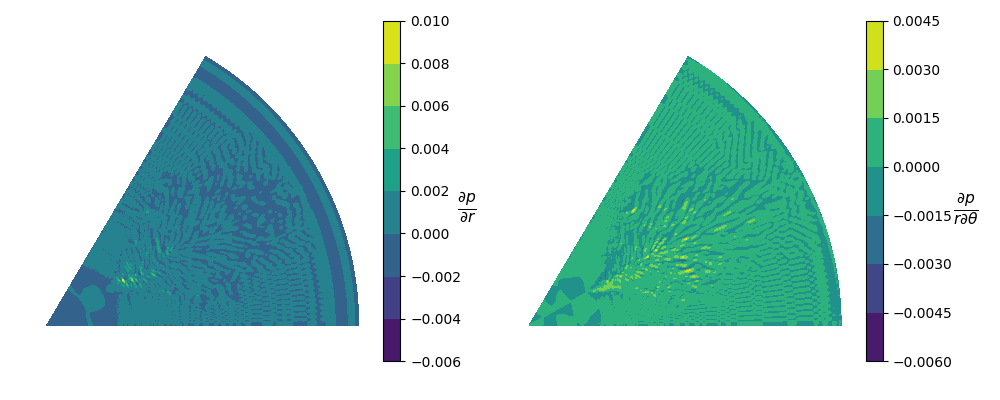

In [43]:
pressure = data[...,6]/data[...,0]

i_ind=1
## Radial PG at the wall
dpdr = np.zeros(np.shape(r[0]))
for k in range(1,len(r[0,0,:])-1):
    for j in range(1,len(r[0,:,0])-1):
        dpdr[j,k] = (pressure[i_ind,j+1,k]-pressure[i_ind,j,k])/(r[0,j+1,k]-r[0,j,k])

## Azimuthal pressure gradient
dpdth = np.zeros(np.shape(r[0]))
for k in range(1,len(r[0,0,:])-1):
    for j in range(1,len(r[0,:,0])-1):
        dpdth[j,k] = 1./r[0,j,k]*(pressure[i_ind,j,k+1]-pressure[i_ind,j,k])/(theta[0,j,k+1]-theta[0,j,k])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
cba=plt.contourf(z[0,:,:],y[0,:,:],dpdr)#,levels=[-0.012,0,0.012])
clb=plt.colorbar(cba)
clb.set_label(r"$\frac{\partial p}{\partial r}$",rotation=0,fontsize=16)
plt.axis('equal')
plt.axis('off')
plt.subplot(1,2,2)
cba=plt.contourf(z[0,:,:],y[0,:,:],dpdth)#,levels=[-0.008,0,0.008])
clb=plt.colorbar(cba)
clb.set_label(r"$\frac{\partial p}{r\partial \theta}$",rotation=0,fontsize=16,labelpad=10)
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.savefig("figures_new/pgrad_i1.pdf")

## Save pressure gradient field
import csv
with open('data_new/dpdr_i'+str(i_ind)+'.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nzp = '+str(nzp), 'nyp = '+str(nyp), 'dpdr'])
    for k in range(nzp):
        for j in range(nyp):
            fp.writerow([str(z[0,j,k]), str(y[0,j,k]), str(dpdr[j,k])])
with open('data_new/dpdth_i'+str(i_ind)+'.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nzp = '+str(nzp), 'nyp = '+str(nyp), 'dpdth'])
    for k in range(nzp):
        for j in range(nyp):
            fp.writerow([str(z[0,j,k]), str(y[0,j,k]), str(dpdth[j,k])])

<IPython.core.display.Javascript object>


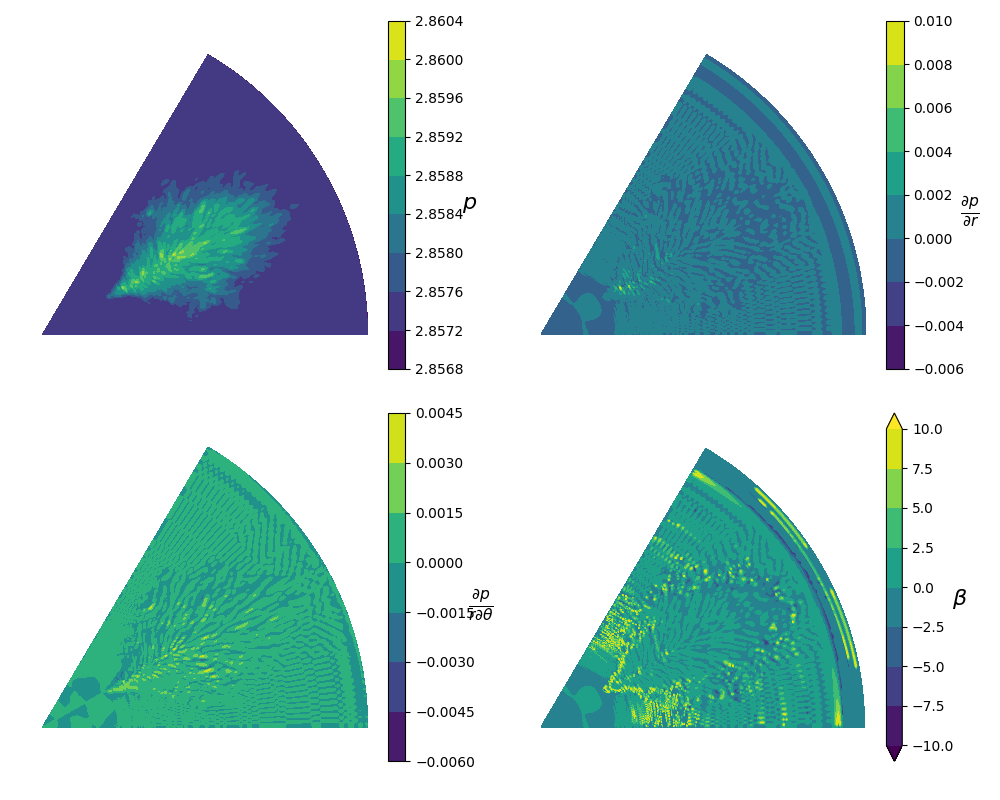

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less


In [38]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
cba = plt.contourf(z[0,:,:],y[0,:,:],pressure[1])
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$p$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('equal')
plt.axis('off')
#plt.axis('equal')

plt.subplot(2,2,2)
cba = plt.contourf(z[0,:,:],y[0,:,:],dpdr)#/data[1,:,:,0])#,levels=np.linspace(0,100,8),extend='max')
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$\frac{\partial p}{\partial r}$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')

plt.subplot(2,2,3)
cba = plt.contourf(z[0,:,:],y[0,:,:],dpdth)#,levels=np.linspace(0,100,8),extend='max')
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$\frac{\partial p}{r \partial \theta}$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')

beta = delta_star*dpdr/u_star**2
beta = np.where(beta > 10, 0, beta)
beta = np.where(beta < -10, 0, beta)

plt.subplot(2,2,4)
cba = plt.contourf(z[0,:,:],y[0,:,:],beta,levels=np.linspace(-10,10,9),extend='both')
clb = plt.colorbar(cba)#,orientation='horizontal')
clb.set_label(r'$\beta$',fontsize=16,rotation=0)#,labelpad=10)
plt.axis('off')
plt.axis('equal')

plt.tight_layout()
plt.show()
plt.savefig('figures_new/p_params.eps')

## Momentum Equation Budgets

### Radial Equation

In [44]:
from deriv import*

zgrid = np.loadtxt('z_grid_1.dat',skiprows=1); rgrid = np.loadtxt('r_grid_1.dat',skiprows=1)
zplane, rplane = np.meshgrid(zgrid,rgrid,indexing='ij')
print zplane[0:10,0], rplane[0:10,0]
print np.shape(zplane)

### Radial Equation
k_ind = int(nzp/2)
i_ind = 1
rho = data[...,0]

dd = deriv()

### Convection terms
drhouzur_dz = dd.d2x_carpenter_4th((rho*u_z*u_r)[:,:,k_ind])/dd.d2x_carpenter_4th(zplane) # Derivative in z
drhourur_dr = dd.d2y_carpenter_4th((rho*u_r*u_r)[:,:,k_ind])/dd.d2y_carpenter_4th(rplane) # Derivative in r
drhouruth_dth = 1/r[0]*(dd.d2y_carpenter_4th((rho*u_r*u_th)[i_ind,:,:])/dd.d2y_carpenter_4th(theta[0])) # Derivative in theta

### Pressure gradient terms
dpdr_1 = dd.d2x_carpenter_4th(pressure[i_ind])/dd.d2x_carpenter_4th(r[0])

### Reynolds stress terms
tau12 = data[...,11] - rho*u_z*u_r; tau22 = data[...,10] - rho*u_r*u_r; tau23 = data[...,14] - rho*u_r*u_th
drhouzur_dzp = dd.d2x_carpenter_4th(tau12[:,:,k_ind])/dd.d2x_carpenter_4th(zplane) # Derivative in z
drhourur_drp = dd.d2y_carpenter_4th(tau22[:,:,k_ind])/dd.d2y_carpenter_4th(rplane) # Derivative in r
drhouruth_dthp = 1/r[0]*(dd.d2y_carpenter_4th(tau23[i_ind,:,:])/dd.d2y_carpenter_4th(theta[0])) # Derivative in theta

### Molecular stress terms
t12 = data[:,:,k_ind,8]*((dd.d2y_carpenter_4th((u_z)[:,:,k_ind])/dd.d2y_carpenter_4th(rplane)) 
                   + (dd.d2x_carpenter_4th((u_r)[:,:,k_ind])/dd.d2x_carpenter_4th(zplane)))
dt12_dz = dd.d2x_carpenter_4th(t12)/dd.d2x_carpenter_4th(zplane)

[0.         0.01       0.02000006 0.03000032 0.04000101 0.05000245
 0.06000507 0.07000937 0.08001594 0.09002547] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(422, 781)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide


<IPython.core.display.Javascript object>


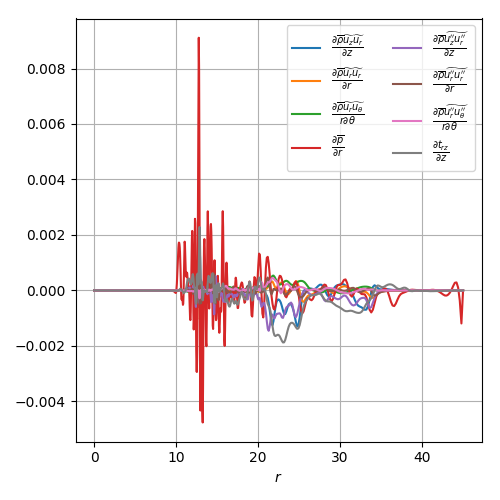

In [56]:
net = (drhouzur_dz[i_ind,:] + drhourur_dr[i_ind,:] + drhouruth_dth[:,k_ind]
      + dpdr[:,k_ind]
      + drhouzur_dzp[i_ind,:] + drhourur_drp[i_ind,:] + drhouruth_dthp[:,k_ind]
      - dt12_dz[i_ind,:])

plt.figure(figsize=(5,5))
plt.plot(rgrid,drhouzur_dz[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_z} \widetilde{u_r}}{\partial z}$')
plt.plot(rgrid,drhourur_dr[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r} \widetilde{u_r}}{\partial r}$')
plt.plot(rgrid,drhouruth_dth[:,k_ind],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r} \widetilde{u_\theta}}{r \partial \theta}$')
#plt.plot(rgrid,net,label=r'$\frac{\partial \overline{\rho} \widetilde{u_z} \widetilde{u_r}}{\partial z}$')

plt.plot(rgrid,dpdr[:,k_ind],label=r'$\frac{\partial \overline{p}}{\partial r}$')

plt.plot(rgrid,drhouzur_dzp[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_z^{\prime \prime} u_r^{\prime \prime}}}{\partial z}$')
plt.plot(rgrid,drhourur_drp[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r^{\prime \prime} u_r^{\prime \prime}}}{\partial r}$')
plt.plot(rgrid,drhouruth_dthp[:,k_ind],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r^{\prime \prime} u_\theta^{\prime \prime}}}{r \partial \theta}$')

plt.plot(rgrid,dt12_dz[i_ind,:],label=r'$\frac{\partial t_{rz}}{\partial z}$')
#plt.plot(rgrid,cylterm[i_ind,:,k_ind],label=r'$H$')
plt.grid(True)
plt.xlabel(r"$r$")
plt.legend(loc='best',ncol=2)
plt.tight_layout()
plt.show()
plt.savefig("figures_new/radialmombudgets.pdf")

In [58]:
## Write to file
labels = [r'$\frac{\partial \overline{\rho} \widetilde{u_z} \widetilde{u_r}}{\partial z}$',
         r'$\frac{\partial \overline{\rho} \widetilde{u_r} \widetilde{u_r}}{\partial r}$',
         r'$\frac{\partial \overline{\rho} \widetilde{u_r} \widetilde{u_\theta}}{r \partial \theta}$',
         r'$\frac{\partial \overline{p}}{\partial r}$',
         r'$\frac{\partial \overline{\rho} \widetilde{u_z^{\prime \prime} u_r^{\prime \prime}}}{\partial z}$',
         r'$\frac{\partial \overline{\rho} \widetilde{u_r^{\prime \prime} u_r^{\prime \prime}}}{\partial r}$',
         r'$\frac{\partial \overline{\rho} \widetilde{u_r^{\prime \prime} u_\theta^{\prime \prime}}}{r \partial \theta}$',
         r'$\frac{\partial t_{rz}}{\partial z}$']

budgets = [drhouzur_dz[i_ind,:], drhourur_dr[i_ind,:], drhouruth_dth[:,k_ind], dpdr[:,k_ind]
            ,drhouzur_dzp[i_ind,:], drhourur_drp[i_ind,:], drhouruth_dthp[:,k_ind], dt12_dz[i_ind,:]]

with open('data_new/radialbudgets.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nyp = '+str(nyp)] + labels)
    for j in range(nyp):
        fp.writerow([str(r[0,j,0])] + [budgets[i][j] for i in range(len(budgets))])

### Azimuthal Budgets

In [63]:
### Azimuthal Equation
k_ind = int(nzp/2)
i_ind = 1

### Convection terms
drhouzuth_dz = dd.d2x_carpenter_4th((rho*u_z*u_th)[:,:,k_ind])/dd.d2x_carpenter_4th(zplane) # Derivative in z
drhouruth_dr = dd.d2y_carpenter_4th((rho*u_r*u_th)[:,:,k_ind])/dd.d2y_carpenter_4th(rplane) # Derivative in r
drhouthuth_dth = 1/r[0]*(dd.d2y_carpenter_4th((rho*u_th*u_th)[i_ind,:,:])/dd.d2y_carpenter_4th(theta[0])) # Derivative in theta

### Pressure gradient terms
dpdth = 1/r[0]*dd.d2y_carpenter_4th(pressure[i_ind])/dd.d2y_carpenter_4th(theta[0])

### Reynolds stress terms
tau13 = data[...,13] - rho*u_z*u_th; tau23 = data[...,14] - rho*u_r*u_th; tau33 = data[...,12] - rho*u_th*u_th
drhouzuth_dzp = dd.d2x_carpenter_4th(tau13[:,:,k_ind])/dd.d2x_carpenter_4th(zplane) # Derivative in z
drhouruth_drp = dd.d2y_carpenter_4th(tau23[:,:,k_ind])/dd.d2y_carpenter_4th(rplane) # Derivative in r
drhouthuth_dthp = 1/r[0]*(dd.d2y_carpenter_4th(tau33[i_ind,:,:])/dd.d2y_carpenter_4th(theta[0])) # Derivative in theta

### Molecular stress terms

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


<IPython.core.display.Javascript object>


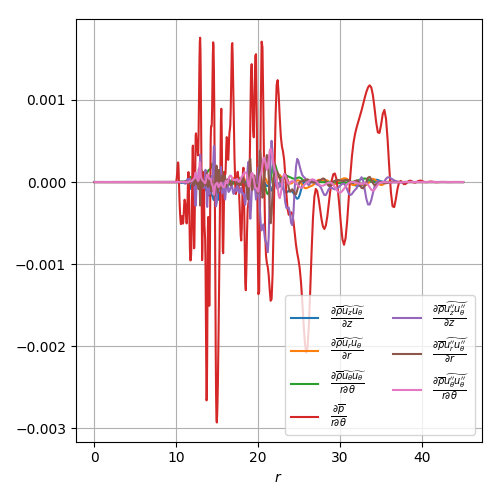

In [64]:
plt.figure(figsize=(5,5))
plt.plot(rgrid,drhouzuth_dz[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_z} \widetilde{u_\theta}}{\partial z}$')
plt.plot(rgrid,drhouruth_dr[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r} \widetilde{u_\theta}}{\partial r}$')
plt.plot(rgrid,drhouthuth_dth[:,k_ind],label=r'$\frac{\partial \overline{\rho} \widetilde{u_\theta} \widetilde{u_\theta}}{r \partial \theta}$')

plt.plot(rgrid,dpdth[:,k_ind],label=r'$\frac{\partial \overline{p}}{r \partial \theta}$')

plt.plot(rgrid,drhouzuth_dzp[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_z^{\prime \prime} u_\theta^{\prime \prime}}}{\partial z}$')
plt.plot(rgrid,drhouruth_drp[i_ind,:],label=r'$\frac{\partial \overline{\rho} \widetilde{u_r^{\prime \prime} u_\theta^{\prime \prime}}}{\partial r}$')
plt.plot(rgrid,drhouthuth_dthp[:,k_ind],label=r'$\frac{\partial \overline{\rho} \widetilde{u_\theta^{\prime \prime} u_\theta^{\prime \prime}}}{r \partial \theta}$')

#plt.plot(rgrid,dt12_dz[i_ind,:],label=r'$\frac{\partial t_{rz}}{\partial z}$')
#plt.plot(rgrid,cylterm[i_ind,:,k_ind],label=r'$H$')
plt.grid(True)
plt.xlabel(r"$r$")
plt.legend(loc='best',ncol=2)
plt.tight_layout()
plt.show()
plt.savefig("figures_new/azimuthalmombudgets.pdf")